In [3]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import PyPDF2

In [ ]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

In [4]:
#Load job description html file
with open("SeniorDataScientist_Glassdoor.html", "r") as file:
    html= file.read()
html

'<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" style="height: 100%;" lang="en" ><head><link href="/jobView/static/css/gd-jobView.4dffe.css" rel="stylesheet" media="all"/><meta  charset="utf-8"/><meta  name="referrer" content="origin"/><meta  name="theme-color" content="#0caa41"/><meta  name="msapplication-navbutton-color" content="#0caa41"/><meta  name="apple-mobile-web-app-capable" content="yes"/><meta  name="apple-mobile-web-app-status-bar-style" content="#0caa41"/><meta  http-equiv="Cache-Control" content="no-cache,must-revalidate"/><meta  http-equiv="Pragma" content="no-cache"/><meta  http-equiv="Expires" content="0"/><meta  name="viewport" content="width=device-width, initial-scale=1.0"/><link  rel="manifest" href="/manifest.json"/><link  rel="shortcut icon" href="/favicon.ico" type="image/vnd.microsoft.icon"/><link  rel="icon" href="/favicon.ico" type="image/x-icon"/><link  rel="preconnect" href="https://fonts.gstatic.co

In [5]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Find the element containing the job description
job_description_element = soup.find('div', {'id': 'JobDescriptionContainer'})
job_description_element

<div class="tabSection p-std mt-0" data-brandviews="MODULE:n=jobListing-description:eid=3600131:jlid=1008700776903" id="JobDescriptionContainer"><style data-emotion-css="1vbe1p2">.css-1vbe1p2{max-height:210px;overflow:hidden;}@media screen and (min-width:768px){.css-1vbe1p2{display:-webkit-box;-webkit-line-clamp:10;-webkit-box-orient:vertical;max-height:none;}}@media screen and (min-width:992px){.css-1vbe1p2{display:block;}}.css-1vbe1p2 *{color:#505863;line-height:1.4em;}.css-1vbe1p2 .ecgq1xb1{padding-left:0;}.css-1vbe1p2 .ecgq1xb1 .ecgq1xb0{margin:0 0 8px 0;}.css-1vbe1p2 ol,.css-1vbe1p2 ul{padding-left:32px;}.css-1vbe1p2 li{margin:10px;margin-bottom:5px;margin-left:20px;line-height:1.4em;}</style><div class="css-1vbe1p2 ecgq1xb4" id="JobDesc1008700776903"><style data-emotion-css="58vpdc">.css-58vpdc{margin-bottom:24px;}.css-58vpdc ul{margin:5px 0 10px 20px;}.css-58vpdc ul > br{display:none;}.css-58vpdc ul > li{margin-left:0;}.css-58vpdc li{padding:0;}</style><div class="desc css-58vpd

In [7]:
# Extract the text from the job description element
if job_description_element is not None:
    job_description = job_description_element.get_text()
    
job_description

'We are Billie, the leading provider of Buy Now, Pay Later (BNPL) payment methods for businesses, offering B2B companies innovative digital payment services and modern checkout solutions. We are to create a new standard for business payments and have made it our mission to simplify the purchasing experience for all businesses making it a tool for growth. Our solutions are based on proprietary, machine-learning-supported risk models, fully digitized processes and a highly scalable tech platform. This makes us a deep-tech company building financial products, not the other way around. We love building simple and elegant solutions and we strive for automation and scalability.\nAbout the role:\n\nAs a Senior Data Scientist, you will be part of the bigger decision science team, and will be contributing to the core decision areas - identification, risk and fraud domain, build experiments to test your hypothesis, perform in-depth analysis and investigation to understand debtors\' behavioral pa

generate wordcould for job description

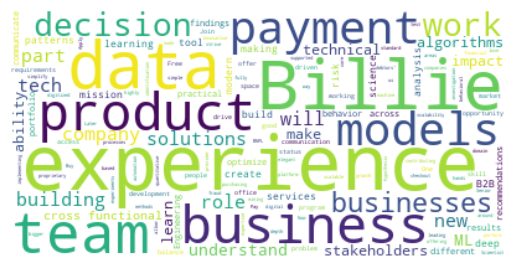

In [8]:
#generate word cloud from job description
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(job_description)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# Tokenize the job description
tokens = word_tokenize(job_description)
tokens

['We',
 'are',
 'Billie',
 ',',
 'the',
 'leading',
 'provider',
 'of',
 'Buy',
 'Now',
 ',',
 'Pay',
 'Later',
 '(',
 'BNPL',
 ')',
 'payment',
 'methods',
 'for',
 'businesses',
 ',',
 'offering',
 'B2B',
 'companies',
 'innovative',
 'digital',
 'payment',
 'services',
 'and',
 'modern',
 'checkout',
 'solutions',
 '.',
 'We',
 'are',
 'to',
 'create',
 'a',
 'new',
 'standard',
 'for',
 'business',
 'payments',
 'and',
 'have',
 'made',
 'it',
 'our',
 'mission',
 'to',
 'simplify',
 'the',
 'purchasing',
 'experience',
 'for',
 'all',
 'businesses',
 'making',
 'it',
 'a',
 'tool',
 'for',
 'growth',
 '.',
 'Our',
 'solutions',
 'are',
 'based',
 'on',
 'proprietary',
 ',',
 'machine-learning-supported',
 'risk',
 'models',
 ',',
 'fully',
 'digitized',
 'processes',
 'and',
 'a',
 'highly',
 'scalable',
 'tech',
 'platform',
 '.',
 'This',
 'makes',
 'us',
 'a',
 'deep-tech',
 'company',
 'building',
 'financial',
 'products',
 ',',
 'not',
 'the',
 'other',
 'way',
 'around',
 '

In [18]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
keywords_without_stopwords = [word for word in tokens if word.casefold() not in stop_words]
keywords_without_stopwords

['Billie',
 ',',
 'leading',
 'provider',
 'Buy',
 ',',
 'Pay',
 'Later',
 '(',
 'BNPL',
 ')',
 'payment',
 'methods',
 'businesses',
 ',',
 'offering',
 'B2B',
 'companies',
 'innovative',
 'digital',
 'payment',
 'services',
 'modern',
 'checkout',
 'solutions',
 '.',
 'create',
 'new',
 'standard',
 'business',
 'payments',
 'made',
 'mission',
 'simplify',
 'purchasing',
 'experience',
 'businesses',
 'making',
 'tool',
 'growth',
 '.',
 'solutions',
 'based',
 'proprietary',
 ',',
 'machine-learning-supported',
 'risk',
 'models',
 ',',
 'fully',
 'digitized',
 'processes',
 'highly',
 'scalable',
 'tech',
 'platform',
 '.',
 'makes',
 'us',
 'deep-tech',
 'company',
 'building',
 'financial',
 'products',
 ',',
 'way',
 'around',
 '.',
 'love',
 'building',
 'simple',
 'elegant',
 'solutions',
 'strive',
 'automation',
 'scalability',
 '.',
 'role',
 ':',
 'Senior',
 'Data',
 'Scientist',
 ',',
 'part',
 'bigger',
 'decision',
 'science',
 'team',
 ',',
 'contributing',
 'core',


In [20]:
tagged_words = nltk.pos_tag(keywords_without_stopwords)
job_keywords = [word for word, tag in tagged_words if tag.startswith('NN') or tag.startswith('JJ')]
job_keywords

['Billie',
 'provider',
 'Buy',
 'Pay',
 'Later',
 'BNPL',
 'payment',
 'methods',
 'businesses',
 'B2B',
 'companies',
 'digital',
 'payment',
 'services',
 'checkout',
 'solutions',
 'new',
 'standard',
 'business',
 'payments',
 'mission',
 'experience',
 'businesses',
 'tool',
 'growth',
 'solutions',
 'proprietary',
 'machine-learning-supported',
 'risk',
 'models',
 'scalable',
 'tech',
 'platform',
 'deep-tech',
 'company',
 'financial',
 'products',
 'way',
 'building',
 'simple',
 'elegant',
 'solutions',
 'strive',
 'automation',
 'scalability',
 'role',
 'Senior',
 'Data',
 'Scientist',
 'part',
 'bigger',
 'decision',
 'science',
 'team',
 'core',
 'decision',
 'areas',
 'identification',
 'risk',
 'fraud',
 'domain',
 'build',
 'experiments',
 'test',
 'hypothesis',
 'in-depth',
 'analysis',
 'investigation',
 'understand',
 'debtors',
 'behavioral',
 'patterns',
 'hands',
 'practical',
 'experience',
 'ML',
 'building',
 'models',
 'different',
 'portfolios',
 'role',
 'a

In [21]:
#convert the job keywords into lowercase
job_keywords = [word.lower() for word in job_keywords]
job_keywords

['billie',
 'provider',
 'buy',
 'pay',
 'later',
 'bnpl',
 'payment',
 'methods',
 'businesses',
 'b2b',
 'companies',
 'digital',
 'payment',
 'services',
 'checkout',
 'solutions',
 'new',
 'standard',
 'business',
 'payments',
 'mission',
 'experience',
 'businesses',
 'tool',
 'growth',
 'solutions',
 'proprietary',
 'machine-learning-supported',
 'risk',
 'models',
 'scalable',
 'tech',
 'platform',
 'deep-tech',
 'company',
 'financial',
 'products',
 'way',
 'building',
 'simple',
 'elegant',
 'solutions',
 'strive',
 'automation',
 'scalability',
 'role',
 'senior',
 'data',
 'scientist',
 'part',
 'bigger',
 'decision',
 'science',
 'team',
 'core',
 'decision',
 'areas',
 'identification',
 'risk',
 'fraud',
 'domain',
 'build',
 'experiments',
 'test',
 'hypothesis',
 'in-depth',
 'analysis',
 'investigation',
 'understand',
 'debtors',
 'behavioral',
 'patterns',
 'hands',
 'practical',
 'experience',
 'ml',
 'building',
 'models',
 'different',
 'portfolios',
 'role',
 'a

In [22]:
# Calculate the frequency distribution of the words
fdist = FreqDist(job_keywords)
fdist

FreqDist({'experience': 10, 'billie': 9, 'data': 6, 'business': 5, 'models': 4, 'team': 4, 'businesses': 3, 'solutions': 3, 'new': 3, 'company': 3, ...})

In [41]:
fdist.most_common(10)

[('experience', 10),
 ('billie', 9),
 ('data', 6),
 ('business', 5),
 ('models', 4),
 ('team', 4),
 ('businesses', 3),
 ('solutions', 3),
 ('new', 3),
 ('company', 3)]

## Check for missing keywords in resume 

In [24]:
#load data scientist technical and soft skills
tech_skills = pd.read_excel('./data/ds_tech_skills.xlsx')
tech_skills.head()

,keywords
0,algorithms
1,Amazon Redshift
2,Amazon S3
3,Amazon Web Services
4,analysis


In [25]:
tech_skills['keywords'].values


array(['algorithms', 'Amazon Redshift', 'Amazon S3',
       'Amazon Web Services', 'analysis', 'Analytic Problem-Solving',
       'analytics', 'APIs', 'Architecture', 'athena', 'aws', 'AWS',
       'bagging', 'bayes theorem', 'bayesian statistics', 'big data',
       'BigData Platforms', 'biotech', 'biotechnology', 'boosting',
       'business intelligence', 'c#', 'c++', 'calculus', 'Cassandra',
       'Charts', 'classification', 'clean data', 'cloud computing',
       'Cloud Storage', 'clustering', 'communication', 'computer science',
       'computer vision', 'computing', 'CouchDB', 'CRM', 'dashboard',
       'data analysis', 'Data Cleaning', 'data engineer',
       'data engineering', 'Data Manipulation', 'Anomaly Detection',
       'data mining', 'Data Governance', 'data modeling', 'Data Privacy',
       'data models', 'data profiling', 'Data Reporting', 'data science',
       'data scientist', 'data sets', 'data structures',
       'data visualisation', 'data visualization', 'data

In [26]:
#convert the technical skills keywords into lowercase
tech_skills = [word.lower() for word in tech_skills['keywords']]
tech_skills

['algorithms',
 'amazon redshift',
 'amazon s3',
 'amazon web services',
 'analysis',
 'analytic problem-solving',
 'analytics',
 'apis',
 'architecture',
 'athena',
 'aws',
 'aws',
 'bagging',
 'bayes theorem',
 'bayesian statistics',
 'big data',
 'bigdata platforms',
 'biotech',
 'biotechnology',
 'boosting',
 'business intelligence',
 'c#',
 'c++',
 'calculus',
 'cassandra',
 'charts',
 'classification',
 'clean data',
 'cloud computing',
 'cloud storage',
 'clustering',
 'communication',
 'computer science',
 'computer vision',
 'computing',
 'couchdb',
 'crm',
 'dashboard',
 'data analysis',
 'data cleaning',
 'data engineer',
 'data engineering',
 'data manipulation',
 'anomaly detection',
 'data mining',
 'data governance',
 'data modeling',
 'data privacy',
 'data models',
 'data profiling',
 'data reporting',
 'data science',
 'data scientist',
 'data sets',
 'data structures',
 'data visualisation',
 'data visualization',
 'data wrangling',
 'database management',
 'databric

In [27]:
soft_skills = pd.read_excel('./data/ds_softskills.xlsx')
soft_skills.head()

,soft_skillls
0,Analytical Thinking
1,Problem-Solving
2,Critical Thinking
3,Communication
4,Collaboration


In [ ]:
#soft_skills['soft_skills'].values

## extract keywords from resume

In [28]:
import PyPDF2
from docx import Document
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [29]:
def extract_keywords_from_pdf(pdf_file):
    pdf_text = ""
    with open(pdf_file, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            pdf_text += page.extract_text()

    return extract_keywords(pdf_text)

def extract_keywords_from_doc(doc_file):
    doc_text = ""
    doc = Document(doc_file)
    for paragraph in doc.paragraphs:
        doc_text += paragraph.text

    return extract_keywords(doc_text)

def extract_keywords(text):

    # Tokenize the resume text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.lower() not in stop_words]

    # Lemmatize words to their base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Get keywords by filtering out non-alphabetic words
    keywords = [word for word in words if word.isalpha()]

    return keywords

In [30]:
# Extract keywords from the pdf resume
pdf_resume_file = "./data/Shivani_CV.pdf"

pdf_keywords = extract_keywords_from_pdf(pdf_resume_file)
print("CV Keywords:", pdf_keywords)

CV Keywords: ['rekala', 'shivani', 'berlin', 'germany', 'english', 'fluent', 'german', 'beginner', 'hindi', 'fluent', 'telugu', 'native', 'data', 'visualisation', 'data', 'analysis', 'matplotlib', 'seaborn', 'plotly', 'web', 'scraping', 'linear', 'algebra', 'analysis', 'python', 'postgresql', 'sql', 'panda', 'numpy', 'bash', 'git', 'cloud', 'computing', 'aws', 'rds', 'docker', 'machine', 'learning', 'tensorflow', 'kera', 'panda', 'numpy', 'deep', 'learning', 'natural', 'language', 'processing', 'nlp', 'spiced', 'academy', 'data', 'science', 'bootcamp', 'intensive', 'data', 'science', 'bootcamp', 'weekly', 'project', 'led', 'domain', 'expert', 'using', 'technology', 'osmania', 'university', 'master', 'business', 'administration', 'human', 'resource', 'management', 'jawaharlal', 'nehru', 'technology', 'university', 'bachelor', 'technology', 'electronica', 'communication', 'engineering', 'talent', 'manager', 'moberries', 'identified', 'sourced', 'top', 'candidate', 'resume', 'analysis', '

In [31]:
# Calculate the frequency distribution of the words
fdist_pdf = FreqDist(pdf_keywords)
fdist_pdf.most_common()

[('data', 8),
 ('learning', 8),
 ('analysis', 6),
 ('candidate', 5),
 ('india', 5),
 ('berlin', 4),
 ('germany', 4),
 ('python', 4),
 ('panda', 4),
 ('numpy', 4),
 ('technology', 4),
 ('hyderabad', 4),
 ('deep', 3),
 ('science', 3),
 ('using', 3),
 ('ensuring', 3),
 ('online', 3),
 ('movie', 3),
 ('image', 3),
 ('fluent', 2),
 ('visualisation', 2),
 ('matplotlib', 2),
 ('seaborn', 2),
 ('web', 2),
 ('machine', 2),
 ('language', 2),
 ('bootcamp', 2),
 ('project', 2),
 ('university', 2),
 ('human', 2),
 ('resource', 2),
 ('talent', 2),
 ('manager', 2),
 ('platform', 2),
 ('service', 2),
 ('accuracy', 2),
 ('hiring', 2),
 ('conducted', 2),
 ('background', 2),
 ('process', 2),
 ('recommender', 2),
 ('collaborative', 2),
 ('filtering', 2),
 ('model', 2),
 ('streamlit', 2),
 ('render', 2),
 ('time', 2),
 ('series', 2),
 ('statsmodels', 2),
 ('temperature', 2),
 ('trend', 2),
 ('classifier', 2),
 ('convolutional', 2),
 ('neural', 2),
 ('network', 2),
 ('transfer', 2),
 ('experience', 2),
 ('p

In [ ]:
#def find_missing_keywords(pdf_keywords, job_keywords):
#    missing_keywords = []
#    for keyword in job_keywords:
#        if keyword not in pdf_keywords:
#            missing_keywords.append(keyword)
#    return missing_keywords

In [ ]:
# Find missing keywords
#missing_keywords = find_missing_keywords(pdf_keywords, job_keywords)
#print("Missing Keywords:", missing_keywords)


In [ ]:
#To read docx file
#doc_resume_file = "./data/Shivani_CV.doc"
#doc_keywords = extract_keywords_from_doc(doc_resume_file)
#print("DOC Keywords:", doc_keywords)

## Suggest revelant projects for the job description

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint

In [33]:
# Load the project dataset
project_data = pd.read_excel('./data/projects.xlsx')
project_data

,Title,Skills,Description
0,The Gapminder Project,"Bash, Git, Pandas, descriptive statistics, mat...","Contributed to the Gapminder project, analyzin..."
1,Titanic classification,"python, numpy, scikit-learn, matplotlib, seabo...","Analyzed Titanic dataset, identifying factors ..."
2,Bike Sharing project,"python, pandas, numpy, scikit-learn, matplotli...",Utilized bike sharing data to analyze usage pa...
3,Text Classification,"web scrapping, natural language processing, N...","Performed text classification on lyrics data, ..."
4,Metabase Dashboard,"SQL, PostgresSQL, cloud computing, AWS, EC2, RDS","Built Northwind metadata dashboard, showcasing..."
5,The Data pipeline,"APIs, Docker, MongoDB, ETL","Built Reddit data pipeline, enabling automated..."
6,Time series Analysis,"statsmodels, markov chains",Performed time series analysis on temperature ...
7,Supermarket simulation,"program design, python",Employed statistical analysis techniques to an...
8,Real-time image classifer,"deep learning, artifical neural network(ANN),c...",Developed a real-time image classifier using d...
9,Online Movie Recommender,"collaborative filtering, Render, Streamlit, co...",Built online movie recommender system using co...


In [34]:

project_data['Skills'] + ' ' + project_data['Description']

0    Bash, Git, Pandas, descriptive statistics, mat...
1    python, numpy, scikit-learn, matplotlib, seabo...
2    python, pandas, numpy, scikit-learn, matplotli...
3    web scrapping, natural language processing,  N...
4    SQL, PostgresSQL, cloud computing, AWS, EC2, R...
5    APIs, Docker, MongoDB, ETL Built Reddit data p...
6    statsmodels, markov chains Performed time seri...
7    program design, python Employed statistical an...
8    deep learning, artifical neural network(ANN),c...
9    collaborative filtering, Render, Streamlit, co...
dtype: object

In [6]:
from sklearn import set_config
set_config(transform_output="pandas")

In [38]:
def suggest_projects(job_description, project_data):
    # Create a TfidfVectorizer to convert text into numerical features
    vectorizer = TfidfVectorizer(stop_words="english", max_features=1000, max_df=0.5, smooth_idf=True)

    # Fit and transform the project data to numerical features
    project_features = vectorizer.fit_transform(project_data['Skills'] + ' ' + project_data['Description'])
    #print(vectorizer.get_feature_names_out())
    
    # Transform the job description into numerical features
    job_features = vectorizer.transform([job_description])
    #print(pd.DataFrame(job_features.todense(), columns=vectorizer.get_feature_names_out()))
    
    # Compute the cosine similarity between the job description and project data
    similarity_scores = cosine_similarity(job_features, project_features).flatten()

    # Sort the projects based on similarity scores
    sorted_indices = similarity_scores.argsort()[::-1]

    # Return the top 5 relevant project titles
    return project_data['Title'].iloc[sorted_indices][:4]

In [39]:

# Example usage
job_description_ = job_description
suggested_projects = suggest_projects(job_description_, project_data)
print("Suggested projects:")
pprint(suggested_projects)


Suggested projects:
2      Bike Sharing project
1    Titanic classification
0     The Gapminder Project
5         The Data pipeline
Name: Title, dtype: object
